# Customer churn prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("Churn_Modelling.csv")

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.columns = map(str.lower, data.columns)
data.rename(columns={'rownumber': 'row_number','customerid':'customer_id','creditscore':'credit_score','numofproducts':'num_of_products','hascrcard':'has_cr_card','isactivemember':'is_active_member','estimatedsalary':'estimated_salary'}, inplace=True)

In [5]:
data.columns

Index(['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited'],
      dtype='object')

In [6]:
data.shape

(10000, 14)

In [7]:
data.isnull().sum()

row_number          0
customer_id         0
surname             0
credit_score        0
geography           0
gender              0
age                 0
tenure              0
balance             0
num_of_products     0
has_cr_card         0
is_active_member    0
estimated_salary    0
exited              0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_number        10000 non-null  int64  
 1   customer_id       10000 non-null  int64  
 2   surname           10000 non-null  object 
 3   credit_score      10000 non-null  int64  
 4   geography         10000 non-null  object 
 5   gender            10000 non-null  object 
 6   age               10000 non-null  int64  
 7   tenure            10000 non-null  int64  
 8   balance           10000 non-null  float64
 9   num_of_products   10000 non-null  int64  
 10  has_cr_card       10000 non-null  int64  
 11  is_active_member  10000 non-null  int64  
 12  estimated_salary  10000 non-null  float64
 13  exited            10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


- Categorical columns = 3
- Numerical columns   = 11

In [9]:
data.describe()

,row_number,customer_id,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


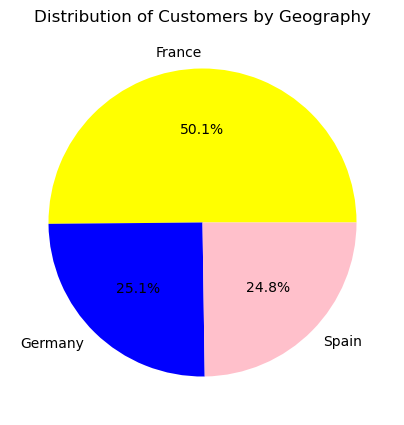

In [10]:
geography_counts = data['geography'].value_counts().reset_index()
plt.figure(figsize=(5,5)) 
plt.pie(geography_counts['geography'],labels=geography_counts['index'], autopct='%1.1f%%',colors=['yellow','blue','pink'])
plt.title('Distribution of Customers by Geography')
plt.show();

Half of the customers are from France

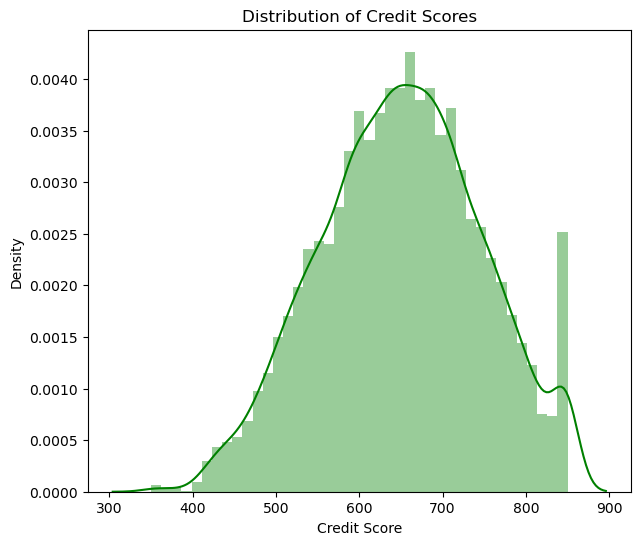

In [11]:
plt.figure(figsize=(7, 6))
sns.distplot(data['credit_score'],color='green')
plt.title('Distribution of Credit Scores')
plt.xlabel('Credit Score')
plt.ylabel('Density');

Most of the people are having Credit score between 600-700 and also 850.

Text(0, 0.5, 'Count')

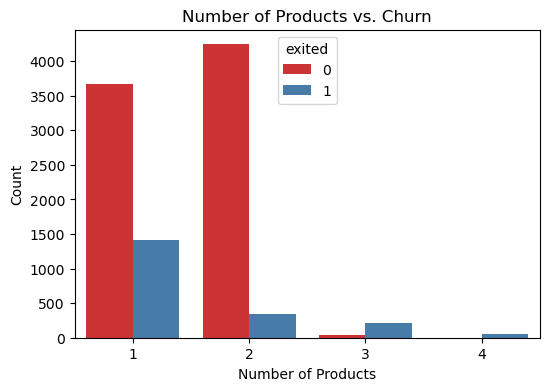

In [12]:
plt.figure(figsize=(6, 4))
sns.countplot(x='num_of_products', hue='exited', data=data ,palette='Set1')
plt.title('Number of Products vs. Churn')
plt.xlabel('Number of Products')
plt.ylabel('Count')

Customers who have only one product from the bank are more likely to leave.

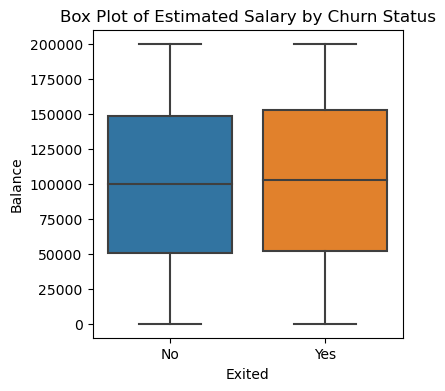

In [13]:
plt.figure(figsize=(4, 4))
sns.boxplot(x='exited', y='estimated_salary', data=data)
plt.title('Box Plot of Estimated Salary by Churn Status')
plt.xlabel('Exited')
plt.ylabel('Balance')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

No Noticifiable difference in the salary distribution of the two groups.

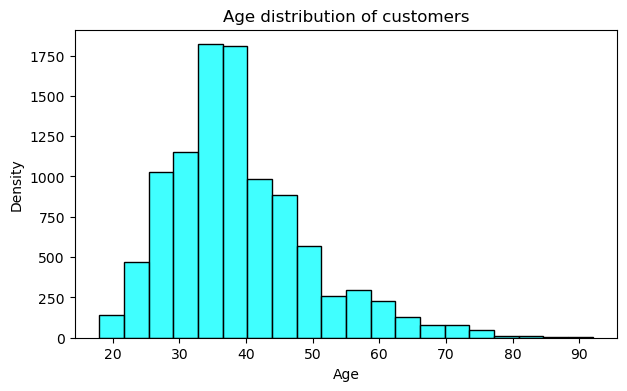

In [14]:
plt.figure(figsize=(7, 4))
sns.histplot(data['age'],color='cyan',bins=20)
plt.title('Age distribution of customers')
plt.xlabel('Age')
plt.ylabel('Density');

Most of the customers in the bank are between 30-40 age

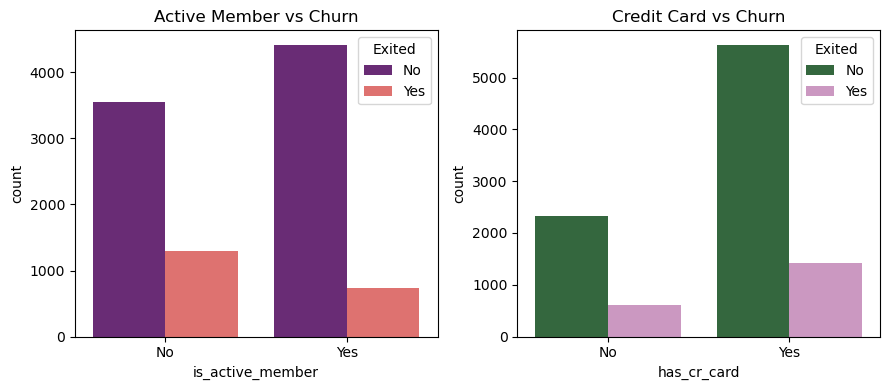

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(9, 4))

sns.countplot(x='is_active_member', hue='exited', data=data, ax=axs[0],palette='magma')
axs[0].set_title('Active Member vs Churn')
axs[0].legend(title='Exited', labels=['No', 'Yes'])
axs[0].set_xticklabels(['No', 'Yes'])

sns.countplot(x='has_cr_card', hue='exited', data=data, ax=axs[1],palette="cubehelix")
axs[1].set_title('Credit Card vs Churn')
axs[1].legend(title='Exited', labels=['No', 'Yes'])
axs[1].set_xticklabels(['No', 'Yes'])

plt.tight_layout()
plt.show()

- Those who are not a active member in the bank are more likely to leave the bank.
- Those who have the credit card is more likely to leave the bank.


In [16]:
churn_rate = data['exited'].mean()
print(f'Churn Rate: {churn_rate:.2%}')

Churn Rate: 20.37%


Approximately 20.37% of the customers in the bank have exited.

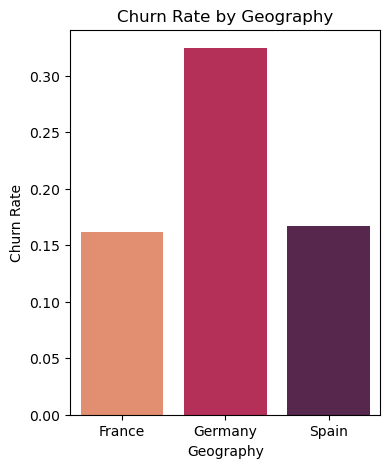

In [17]:
plt.figure(figsize=(4, 5))
churn_rate_geo = data.groupby('geography')['exited'].mean()
sns.barplot(x=churn_rate_geo.index, y=churn_rate_geo.values,palette='rocket_r')

plt.title('Churn Rate by Geography')
plt.xlabel('Geography')
plt.ylabel('Churn Rate')
plt.show()

Germany has the highest churn rate

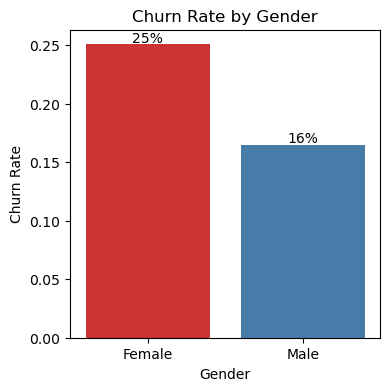

In [18]:
plt.figure(figsize=(4, 4))
churn_rate_gender = data.groupby('gender')['exited'].mean()
ax=sns.barplot(x=churn_rate_gender.index, y=churn_rate_gender.values,palette='Set1')
for i, v in enumerate(churn_rate_gender.values):
   ax.text(i, v + 0.002, f'{v:.0%}', ha='center')
plt.title('Churn Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Churn Rate')
plt.show()

Females has the more churn rate then males.

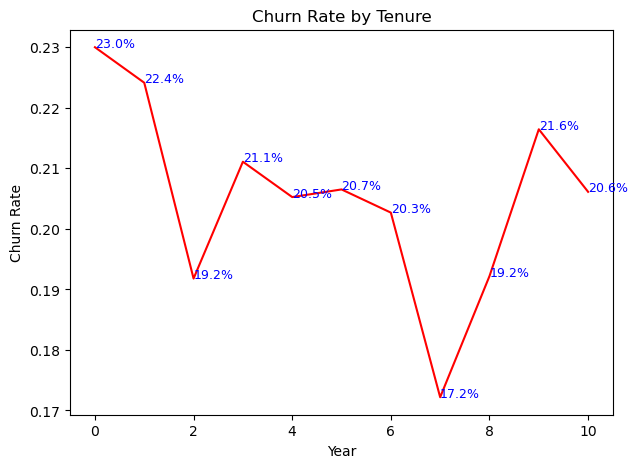

In [19]:
plt.figure(figsize=(7, 5))
churn_rate_ten = data.groupby('tenure')['exited'].mean()
sns.lineplot(x=churn_rate_ten.index, y=churn_rate_ten.values,color='red')
for x, y in zip(churn_rate_ten.index, churn_rate_ten.values):
    plt.text(x, y, '{:.01%}'.format(y), color='blue', fontsize=9)

plt.title('Churn Rate by Tenure')
plt.xlabel('Year')
plt.ylabel('Churn Rate')
plt.show()

Customers with Tenure of 2 , 7 , 8  years have the lowest churn rate.

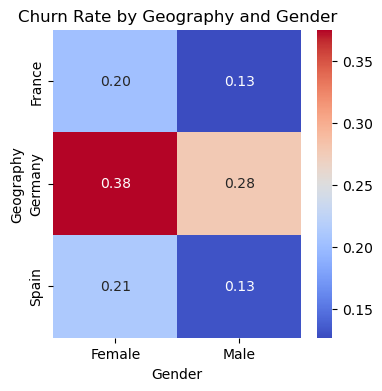

In [20]:
pivot_table = data.pivot_table(values='exited', index='geography', columns='gender', aggfunc='mean')

plt.figure(figsize=(4, 4))
sns.heatmap(pivot_table, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Churn Rate by Geography and Gender')
plt.xlabel('Gender')
plt.ylabel('Geography')
plt.show()

Germany has the highest female churn rate.

### Correlation Between Numerical columns

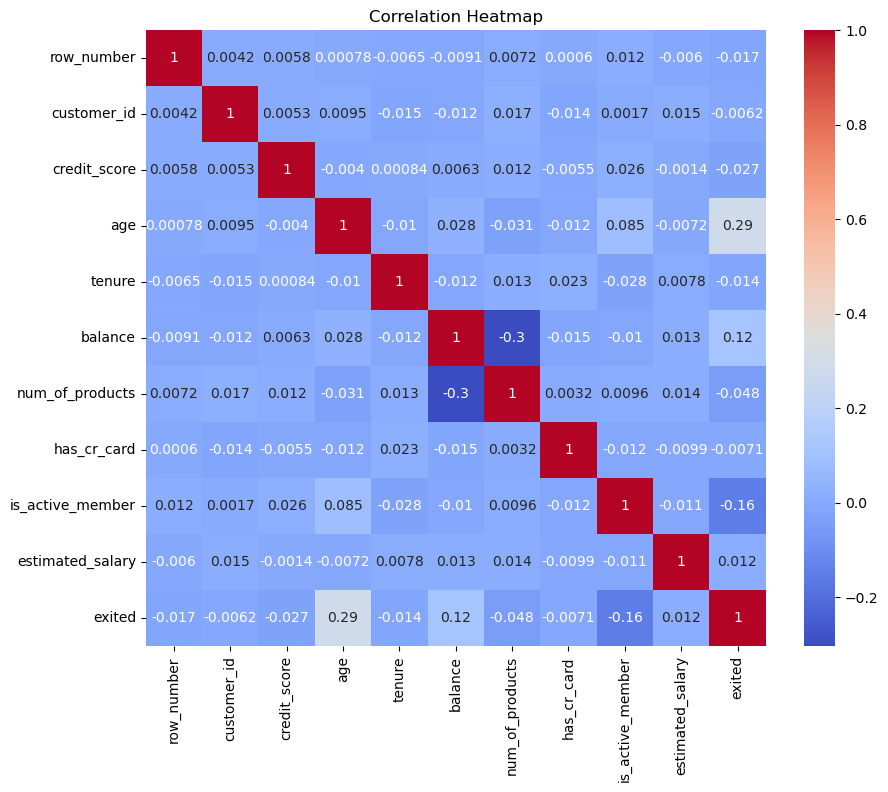

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Feature Engineering

In [22]:
data.columns

Index(['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited'],
      dtype='object')

We will be dropping row_number , customer_id , surname columns as they are not that much important in our prediction

In [23]:
data=data.drop(['row_number','customer_id','surname'],axis=1)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   geography         10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   num_of_products   10000 non-null  int64  
 7   has_cr_card       10000 non-null  int64  
 8   is_active_member  10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  exited            10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


Geography and Gender is in categorical type so we will encode these columns.

In [25]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
label_encoder = LabelEncoder()
data['geography'] = label_encoder.fit_transform(data['geography'])
data['gender'] = label_encoder.fit_transform(data['gender'])

In [26]:
scaler = StandardScaler()
numeric_features = ['credit_score', 'age', 'balance', 'estimated_salary', 'num_of_products', 'tenure']
data[numeric_features] = scaler.fit_transform(data[numeric_features])

In [27]:
from sklearn.model_selection import train_test_split
X = data.drop('exited', axis=1)
y = data['exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# Model Training

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model_lr = LogisticRegression()

model_lr.fit(X_train, y_train)
y_pred = model_lr.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy_lr * 100:.2f}%")
print("Classification Report:")
print(report)

Accuracy: 80.70%
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1595
           1       0.58      0.18      0.27       405

    accuracy                           0.81      2000
   macro avg       0.70      0.57      0.58      2000
weighted avg       0.77      0.81      0.76      2000



In [35]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()

model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy_rf * 100:.2f}%")
print("Classification Report:")
print(report)

Accuracy: 86.80%
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1595
           1       0.76      0.51      0.61       405

    accuracy                           0.87      2000
   macro avg       0.82      0.74      0.77      2000
weighted avg       0.86      0.87      0.86      2000



In [36]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier()

model_dt.fit(X_train,y_train)
y_pred = model_dt.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy_dt * 100:.2f}%")
print("Classification Report:")
print(report)

Accuracy: 79.05%
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.85      0.87      1595
           1       0.48      0.55      0.52       405

    accuracy                           0.79      2000
   macro avg       0.68      0.70      0.69      2000
weighted avg       0.80      0.79      0.80      2000

